# How to read and process raw data

In this file, I am going to show you how to read a *raw* data file. Raw data files are the files that we get from the MEG.

In order to do all the analysis, we use an open source Python toolbox called [MNE-Python](https://mne.tools). Remember? You already installed it!

[MNE-Python](https://mne.tools) offers convenient functions and methods to analyze MEG and EEG data. Take a look at the website where you can find lots of tutorials and, most importantly, the so-called [Reference](https://mne.tools/stable/python_reference.html). The Reference describes all the functions and clases MNE-Python has to offer.

## Import packages

So, as for `numpy` in the previous example, we need to import it first. We are also going to import the `RawSounds` class from the `helpers.raw` module that is shipped with this code. It extends the `Raw` class provided by MNE-Python by already adding trigger/event handling.

In [1]:
from helpers.raw import RawSounds
import mne

# We need this so that plots appear in separate windows.
%matplotlib qt

## Read the raw data

The following code reads the raw data file and puts it into a `RawSounds` object.

### Interlude: Objects and classes

Python is a so-called object-oriented language. And MNE-Python uses this concept extensively. So, what are objects?

Objects are variables that have so-called `properties` and `methods`. Properties are basically sub-variables. Methods are like functions that process the object they are attached to.

Do not worry if this is not clear yet. We will use the raw data object we are about to create as an example.

But first, we need to create the object. Remember that we imported the `RawSounds` class above? We create an object of it by just calling it like a function with the path to the file as the parameter:

In [2]:
data = RawSounds('data/raw/raw_data.fif', preload=True)

Opening raw data file data/raw/raw_data.fif...


/home/th/git/code_for_teaching/dntmce_analysis/.venv/lib/python3.11/site-packages/obob_mne/mixins/raw.py:225: RuntimeWarning: This filename (data/raw/raw_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  super(AdvancedEvents, self).__init__(*args, **kwargs)


    Read a total of 13 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 1800 ... 139799 =      9.000 ...   698.995 secs
Ready.
Reading 0 ... 137999  =      0.000 ...   689.995 secs...
2001 events found
Event IDs: [  3  17  33  65 129]


## Exploring the raw object.

Take a look at the [documentation for the Raw class in the MNE-Python website](https://mne.tools/stable/generated/mne.io.Raw.html). They list all the `properties` (they call them `attributes`) and methods the class has.

In order to get an overview, what we loaded here. Let's get an overview:

In [4]:
data.info

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 IAS, 102 Magnetometers, 204 Gradiometers, 2 misc, 17 Stimulus, 1 SYST
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 771 items (3 Cardinal, 5 HPI, 763 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 100.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 340
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: generated with autossp-1.0.1: off, generated with autossp-1.0.1: ...
 sfreq: 200.0 Hz
 subject_info: 7 items (dict)
>

## Let's take a look at the data

But what is in our data? How does it look like? Luckily, there is a method called `plot` that does that for us:

In [8]:
data.plot()

But where are our triggers? The raw class we use actually adds an extra property called `events` and the `plot` methods accepts a corresponding parameter:

In [6]:
data.plot(events=data.events)

The `Raw` object has some more really interesting properties:

In [5]:
print(data.times)
print(data.ch_names)
print(data.info)

[0.00000e+00 1.00000e-03 2.00000e-03 ... 2.16997e+02 2.16998e+02
 2.16999e+02]
['EOG001', 'EOG002', 'ECG003', 'IASX+', 'IASX-', 'IASY+', 'IASY-', 'IASZ+', 'IASZ-', 'IAS_DX', 'IAS_DY', 'IAS_X', 'IAS_Y', 'IAS_Z', 'MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123', 'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141', 'MEG0142', 'MEG0143', 'MEG0211', 'MEG0212', 'MEG0213', 'MEG0221', 'MEG0222', 'MEG0223', 'MEG0231', 'MEG0232', 'MEG0233', 'MEG0241', 'MEG0242', 'MEG0243', 'MEG0311', 'MEG0312', 'MEG0313', 'MEG0321', 'MEG0322', 'MEG0323', 'MEG0331', 'MEG0332', 'MEG0333', 'MEG0341', 'MEG0342', 'MEG0343', 'MEG0411', 'MEG0412', 'MEG0413', 'MEG0421', 'MEG0422', 'MEG0423', 'MEG0431', 'MEG0432', 'MEG0433', 'MEG0441', 'MEG0442', 'MEG0443', 'MEG0511', 'MEG0512', 'MEG0513', 'MEG0521', 'MEG0522', 'MEG0523', 'MEG0531', 'MEG0532', 'MEG0533', 'MEG0541', 'MEG0542', 'MEG0543', 'MEG0611', 'MEG0612', 'MEG0613', 'MEG0621', 'MEG0622', 'MEG0623', 'MEG0631', 'MEG0632', 'MEG0633', 'MEG0641', 'MEG0642', 'MEG0643

We can also take a look at the sensors

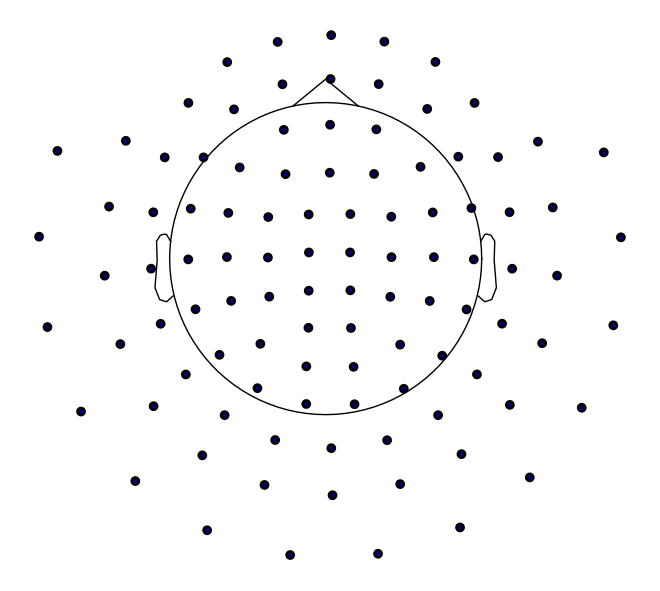

In [7]:
data.plot_sensors()

Want a direct look at the data?

In [9]:
print(data.get_data().shape)

(340, 138000)


Note that the parentheses! `get_data` is a method of the object, not a property!

## Filtering

One handy and often used method is the [filter method](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.filter):

In [10]:
filtered_data = data.copy()
filtered_data.filter(l_freq=1, h_freq=10)
filtered_data.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:   11.0s finished


## Maxwell Filtering

As you might have seen, the MEG data is rather noisy, especially if the projections were kept in. Removing those projections gets us pretty far, but lots of noise still remains in the data. Additionally, there might be some channels that are too noisy that we want to remove.

The people at Elekta (the manifacturer of our MEG) developed a nice technique called SSS (subspace separation) or maxfilter. And it is implemented in MNE-Python:

In [11]:
(ch_noise, ch_flat) = mne.preprocessing.find_bad_channels_maxwell(data)
data.info['bads'] = ch_noise + ch_flat

data_maxfiltered = mne.preprocessing.maxwell_filter(data)

data_maxfiltered.plot()

Applying low-pass filter with 40.0 Hz cutoff frequency ...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 67 samples (0.335 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:   21.7s finished


Scanning for bad channels in 138 intervals (5.0 s) ...
102 of 102 magnetometer types replaced with T3.
    No bad MEG channels
    Processing 204 gradiometers and 102 magnetometers
    Automatic origin fit: head of radius 90.0 mm
    Using origin -4.3, -0.9, 53.8 mm in the head frame
        Interval   1:    0.000 -    4.995
        Interval   2:    5.000 -    9.995
        Interval   3:   10.000 -   14.995
        Interval   4:   15.000 -   19.995
        Interval   5:   20.000 -   24.995
        Interval   6:   25.000 -   29.995
        Interval   7:   30.000 -   34.995
        Interval   8:   35.000 -   39.995
        Interval   9:   40.000 -   44.995
        Interval  10:   45.000 -   49.995
        Interval  11:   50.000 -   54.995
        Interval  12:   55.000 -   59.995
        Interval  13:   60.000 -   64.995
        Interval  14:   65.000 -   69.995
        Interval  15:   70.000 -   74.995
        Interval  16:   75.000 -   79.995
        Interval  17:   80.000 -   84.995
 

## Triggers and Events

So, looking at the raw data is great. But we want to see what happens when the subject heard a sound. So, we need to know when what happened.

You probably remember that we recorded "Triggers" with the data.
The events are stored in the `data` object:

In [12]:
data_maxfiltered.events

array([[  5166,      0,     17],
       [  5233,      0,    129],
       [  5300,      0,     65],
       ...,
       [138366,      0,     65],
       [138433,      0,     17],
       [138499,      0,    129]])

This is basically a table with three columns. You can ignore the middle column. The first column specifies *when* the event took place in samples. The last column holds the trigger value. This specifies, what sound was played and whether it was tuned or detuned.

Dealing with these raw values is not really intuitive. Luckily, there is another property called `evt_metadata`:

In [13]:
data_maxfiltered.evt_metadata

condition_detuned  markov  freq tone_detuned
0                  yes  random     1          yes
1                  yes  random     4          yes
2                  yes  random     3          yes
3                  yes  random     4          yes
4                  yes  random     1          yes
...                ...     ...   ...          ...
1995               yes  random     3          yes
1996               yes  random     3          yes
1997               yes  random     3          yes
1998               yes  random     1          yes
1999               yes  random     4          yes

[2000 rows x 4 columns]

This table also tells you if the tone was detuned or not, what frequency it had and if the markov sequence was random or ordered.

The condition columns all have the same value because as you might remember, we used a block design for these factors and we only read the raw data of one block.

## Creating epochs

What we actually need for our analysis is not the raw and continous data. We want to cut out the data around the relevant events.

Once we have that, we can average them our classifiy them according to the frequencies.

In [14]:
epochs = mne.Epochs(raw=data_maxfiltered,
                    events=data.events,
                    metadata=data.evt_metadata,
                    tmin=-0.2, tmax=0.7)

epochs

Adding metadata with 4 columns
2000 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs |  2000 events (good & bad), -0.2 – 0.7 s, baseline -0.2 – 0 s, ~6.5 MB, data not loaded, with metadata,
 '17': 521
 '33': 489
 '65': 498
 '129': 492>

## What do we have here?

As you can see above, we now have 2000 epochs in our `epochs` object.

To keep things simple, we can just average them all and plot them:

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


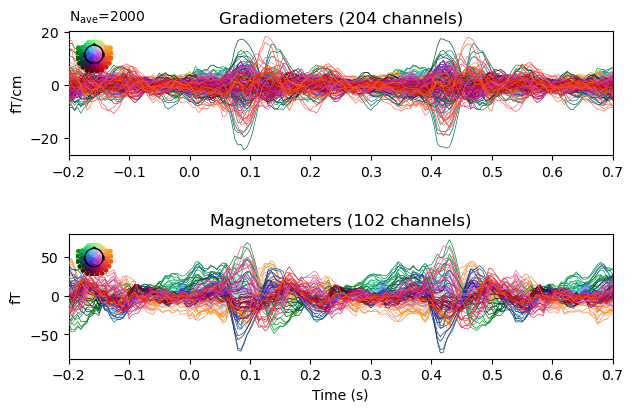

In [15]:
avg = epochs.average()
avg.plot()

## How to choose a subset of epochs

So, what we see is an average of all the epochs. But this is not really what we want, is it? We want to be able to access individual epochs and maybe also choose to only use the ones of a particular frequency and condition.

First, an `Epochs` object can be accessed like any list:

In [10]:
epochs[0] # The first
epochs[:100] # The first hundred

<Epochs |  100 events (good & bad), -0.2 – 0.7 s, baseline -0.2 – 0 s, ~6.5 MB, data not loaded, with metadata,
 '17': 29
 '33': 22
 '65': 27
 '129': 22>

But we can become more advanced! Remember the `evt_metadata` property of the `Raw` object? This has turned into the `metadata` object of the `Epoch`:

In [16]:
epochs.metadata

condition_detuned  markov  freq tone_detuned
0                  yes  random     1          yes
1                  yes  random     4          yes
2                  yes  random     3          yes
3                  yes  random     4          yes
4                  yes  random     1          yes
...                ...     ...   ...          ...
1995               yes  random     3          yes
1996               yes  random     3          yes
1997               yes  random     3          yes
1998               yes  random     1          yes
1999               yes  random     4          yes

[2000 rows x 4 columns]

And we can use this information to extract only the epochs we need.

In [17]:
epochs['freq==1']

<Epochs |  521 events (good & bad), -0.2 – 0.7 s, baseline -0.2 – 0 s, ~6.5 MB, data not loaded, with metadata,
 '17': 521>

In [ ]:
epochs['freq==1'].average().plot()

## Let's load the calibration data

As you have seen, the data we loaded is not from the cocktail party experiment... Let's load some of that but first free up some RAM...

In [18]:
del data
del data_maxfiltered


In [19]:

from helpers.raw import CalibrationRaw

calibration_data = CalibrationRaw('19961110brpl')

Opening raw data file data/fiff/data_raw/th_donottrackmycocktaileye/subject_subject/230428/19961110brpl_calibration.fif...
    Read a total of 13 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 7000 ... 204999 =      7.000 ...   204.999 secs
Ready.


/home/th/git/code_for_teaching/dntmce_analysis/.venv/lib/python3.11/site-packages/obob_mne/mixins/raw.py:225: RuntimeWarning: This filename (data/fiff/data_raw/th_donottrackmycocktaileye/subject_subject/230428/19961110brpl_calibration.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  super(AdvancedEvents, self).__init__(*args, **kwargs)


Reading 0 ... 197999  =      0.000 ...   197.999 secs...
Creating RawArray with float64 data, n_channels=2, n_times=198000
    Range : 0 ... 197999 =      0.000 ...   197.999 secs
Ready.


/home/th/git/code_for_teaching/dntmce_analysis/helpers/raw.py:208: UserWarning: Found a bogus trigger
  warn('Found a bogus trigger')
/home/th/git/code_for_teaching/dntmce_analysis/helpers/raw.py:124: RuntimeWarning: Mean of empty slice
  x_data = np.nanmean(eye_raw_data[:, [1, 4]].T, axis=0)
/home/th/git/code_for_teaching/dntmce_analysis/helpers/raw.py:125: RuntimeWarning: Mean of empty slice
  y_data = np.nanmean(eye_raw_data[:, [2, 5]].T, axis=0)


Creating RawArray with float64 data, n_channels=2, n_times=198000
    Range : 0 ... 197999 =      0.000 ...   197.999 secs
Ready.


Let's take a quick look...

In [20]:
x = calibration_data.copy().pick(['eyetracker_x', 'eyetracker_y', 'calibration_x', 'calibration_y'])

x.plot(scalings='auto')

Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection | generated with autossp-1.0.1, active : False, n_channels : 306>
Removing projector <Projection

As you can see, eyetracker data and the calibration data have already been added

## Let's load the cocktail data

And now the cocktail data

In [21]:
from helpers.raw import CocktailSpeechRaw

data = CocktailSpeechRaw(subject_id='19961110brpl', block_nr=1)

Opening raw data file data/fiff/data_raw/th_donottrackmycocktaileye/subject_subject/230428/19961110brpl_cocktail_blk1.fif...
    Read a total of 13 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 68000 ... 594999 =     68.000 ...   594.999 secs


/home/th/git/code_for_teaching/dntmce_analysis/.venv/lib/python3.11/site-packages/obob_mne/mixins/raw.py:225: RuntimeWarning: This filename (data/fiff/data_raw/th_donottrackmycocktaileye/subject_subject/230428/19961110brpl_cocktail_blk1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  super(AdvancedEvents, self).__init__(*args, **kwargs)


Ready.
Reading 0 ... 526999  =      0.000 ...   526.999 secs...


/home/th/git/code_for_teaching/dntmce_analysis/.venv/lib/python3.11/site-packages/pymatreader/utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Creating RawArray with float64 data, n_channels=2, n_times=527000
    Range : 0 ... 526999 =      0.000 ...   526.999 secs
Ready.


/home/th/git/code_for_teaching/dntmce_analysis/helpers/raw.py:124: RuntimeWarning: Mean of empty slice
  x_data = np.nanmean(eye_raw_data[:, [1, 4]].T, axis=0)
/home/th/git/code_for_teaching/dntmce_analysis/helpers/raw.py:125: RuntimeWarning: Mean of empty slice
  y_data = np.nanmean(eye_raw_data[:, [2, 5]].T, axis=0)


Creating RawArray with float64 data, n_channels=2, n_times=527000
    Range : 0 ... 526999 =      0.000 ...   526.999 secs
Ready.


## And let' take a quick look at it.

See how we already added the envelope and eyetracker data...

In [22]:
data.plot(events=data.events)